In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explain the dataset

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
# first column is irrelevant and unnamed and giving only serial numbers we have index numbers
# hence deleting the first column unnamed
del df['Unnamed: 0']
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.shape

(200, 4)

In [10]:
#representaion of sales from the advertisements
import warnings
warnings.filterwarnings("ignore")
sales=df.groupby(['Sales'])['TV','Radio','Newspaper'].mean()
sales

,TV,Radio,Newspaper
Sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


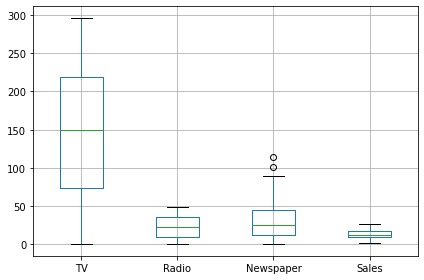

In [11]:
df[['TV','Radio','Newspaper','Sales']].boxplot()
plt.tight_layout()

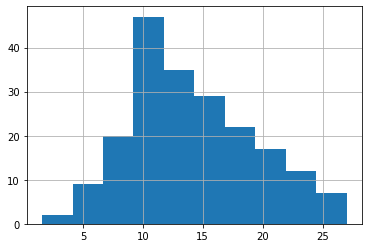

In [12]:
df['Sales'].hist()
plt.show()

### 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings. 

In [14]:
from scipy import stats
from scipy.stats import f_oneway
# H0:Same amount was spent for three advertisement.
# H1:Different amount was spent for three advertisement.
alpha=.05
f_oneway(df['TV'],df['Radio'], df['Newspaper'])

F_onewayResult(statistic=358.8514595342597, pvalue=4.552931539744962e-103)

Null hypothesis is rejected due to pvalue less than alpha
so it is evident that different amount was spent for three advertisments